# An Analysis of Mary Dana Louise B. Torio's Evaluations
Prepared by Matthew Romero  
Master of Science in Data Science 2021   
Asian Institute of Management  

---

*All rights reserved. No part of this document may be reproduced or transmitted in any form or by any means, or stored in any retrieval system of any nature without prior written permission.*

© 2021

<div><span style="background-color: blue; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> EXECUTIVE SUMMARY </span></div>

Analyzed in this notebook are the unstructured (text) comments and ratings of Ms. Torio's evaluation. Exploratory Data Analysis is performed to see how her students view her. Based on available data (68 students), we perform Categorical  Qualitative Analysis and Natural Language Processing via Wordcloud on the dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
sns.set(style="darkgrid", context="talk")

In [2]:
#Load excel file for analysis
df = pd.read_excel('dana.xlsx')

In [3]:
#Show first 5 data points 
df.head()

,Timestamp,"Name of Teacher (Surname, First Name)",Subject Taught,Grade Level,Section,My teacher... [comes to class on time],My teacher... [speaks clearly],My teacher... [gives clear verbal and written instructions],My teacher... [reminds us of online class protocols],My teacher... [is prepared and organized in presenting the lesson/activity],...,My teacher... [is available for consultation.],My teacher... [gives me timely feedback.],My teacher... [posts tasks on time],My teacher... [gives reasonable workload and due dates],My teacher... [guides me over asynchronous sessions with more examples and follow-up activities I can refer to],My teacher... [makes connections with past lessons and eventually makes summaries],My teacher... [is fair in dealing with us as a class and as individuals],My teacher... [shows concern for my learning progress and overall well-being],What are your teacher's strong points as an online teacher?,What points can he/she improve on?
0,2021-03-24 14:03:43.217,"Torio, Mary Dana Lousie",English,Grade 12,Denn,Always,Always,Always,Always,Always,...,Always,Always,Always,Always,Always,Always,Always,Always,Her out of the box methods keeps us hooked on ...,Keep doing what she's doing
1,2021-03-24 14:45:18.098,"Torio, Mary Dana Louise",Literary,Grade 12,Denn,Always,Always,Always,Always,Always,...,Always,Always,Always,Most of the time,Always,Always,Always,Always,Understanding and encourages us to participate...,NaN
2,2021-03-24 15:09:24.235,"Torio, Mary Dana Louise",Literature,Grade 12,Evans,Always,Always,Always,Always,Always,...,Most of the time,Always,Always,Always,Always,Always,Always,Always,She is very accommodating when you have questi...,She can improve by making the class more inter...
3,2021-03-24 15:43:56.068,"Torio, Mary",English,Grade 12,Geronimo,Always,Always,Always,Always,Always,...,Most of the time,Always,Always,Always,Always,Always,Always,Always,Good style of teaching,NaN
4,2021-03-24 15:53:11.647,"Torio, Mary Dana Louise",21st Century Literature,Grade 12,Geronimo,Always,Always,Always,Always,Always,...,Always,Always,Always,Always,Always,Always,Always,Always,- Passionate in teaching\n- Very comprehensive...,NaN


In [4]:
#Rename columns for easier analysis

cols = df.columns.tolist()[5:]

change_cols = {
    cols[0]:'punctuality',
    cols[1]:'speaking_clarity',
    cols[2]:'clear_instructions',
    cols[3]:'protocols',
    cols[4]:'preparedness',
    cols[5]:'pace',
    cols[6]:'encourage',
    cols[7]:'motivating',
    cols[8]:'availability_consultation',
    cols[9]:'feedback',
    cols[10]:'tasks_time',
    cols[11]:'workload',
    cols[12]:'guidance',
    cols[13]:'connections_past',
    cols[14]:'fairness',
    cols[15]:'concern',
    cols[16]:'strong_points',
    cols[17]:'for_improvement'
}

df = df.rename(columns=change_cols)

In [5]:
#Drop first two columns as they are not important for analysis

df = df.drop(df.columns[0:2], axis=1)

In [6]:
#Show first 5 rows of new dataset
df['for_improvement'] = df['for_improvement'].fillna("") 
df.head()


,Subject Taught,Grade Level,Section,punctuality,speaking_clarity,clear_instructions,protocols,preparedness,pace,encourage,...,availability_consultation,feedback,tasks_time,workload,guidance,connections_past,fairness,concern,strong_points,for_improvement
0,English,Grade 12,Denn,Always,Always,Always,Always,Always,Always,Always,...,Always,Always,Always,Always,Always,Always,Always,Always,Her out of the box methods keeps us hooked on ...,Keep doing what she's doing
1,Literary,Grade 12,Denn,Always,Always,Always,Always,Always,Always,Always,...,Always,Always,Always,Most of the time,Always,Always,Always,Always,Understanding and encourages us to participate...,
2,Literature,Grade 12,Evans,Always,Always,Always,Always,Always,Always,Always,...,Most of the time,Always,Always,Always,Always,Always,Always,Always,She is very accommodating when you have questi...,She can improve by making the class more inter...
3,English,Grade 12,Geronimo,Always,Always,Always,Always,Always,Always,Always,...,Most of the time,Always,Always,Always,Always,Always,Always,Always,Good style of teaching,
4,21st Century Literature,Grade 12,Geronimo,Always,Always,Always,Always,Always,Always,Always,...,Always,Always,Always,Always,Always,Always,Always,Always,- Passionate in teaching\n- Very comprehensive...,


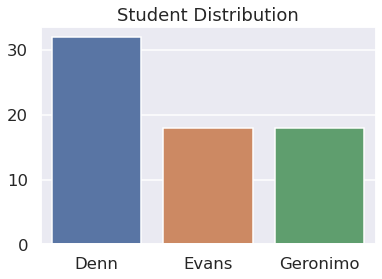

In [7]:
#Count student distribution

section_count = df.Section.value_counts()
sns.barplot(x=section_count.index, y=section_count.values, data = df)
plt.title('Student Distribution');

<div><span style="background-color: blue; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> Plotting scores for specific areas (punctuality, speaking clarity, etc) </span></div>

In [8]:
col_names = df.columns[3:19]
col_names

Index(['punctuality', 'speaking_clarity', 'clear_instructions', 'protocols',
       'preparedness', 'pace', 'encourage', 'motivating',
       'availability_consultation', 'feedback', 'tasks_time', 'workload',
       'guidance', 'connections_past', 'fairness', 'concern'],
      dtype='object')

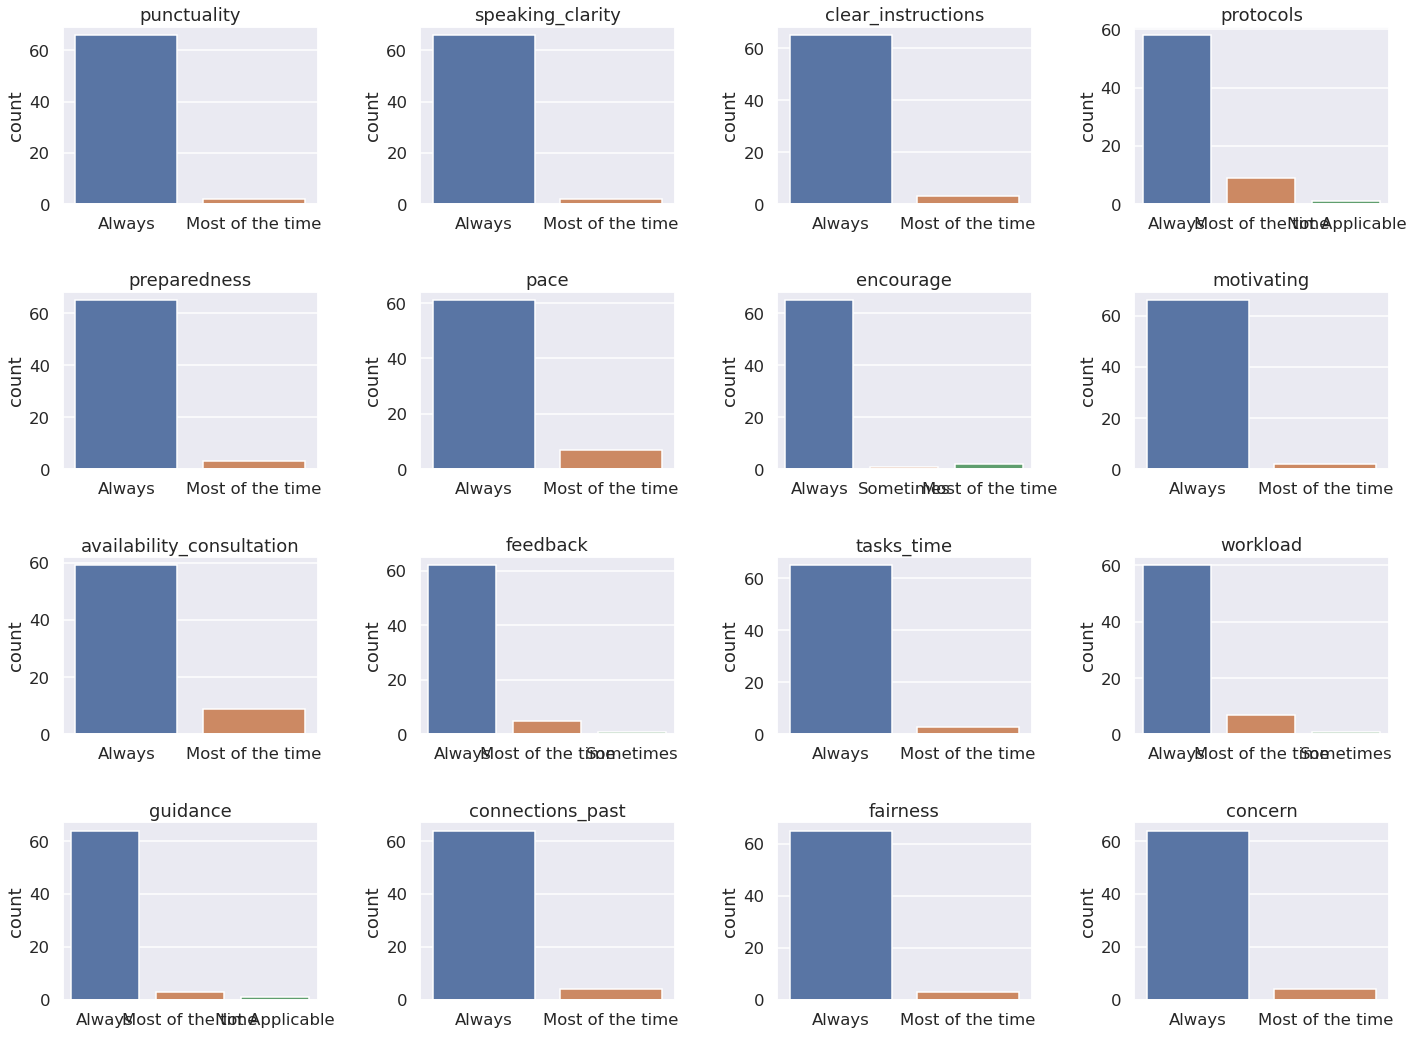

In [9]:
fig, ax = plt.subplots(4, 4, figsize=(20,15))
axs = ax.ravel()

for i, cols in zip(range(len(axs)), col_names):
    sns.countplot(x=cols, data=df, ax=axs[i])
    axs[i].set_xlabel(" ", rotation=45)
    axs[i].set_title(cols)
    
fig.tight_layout()
plt.show()

<div><span style="background-color: blue; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> Ms. Torio's Strong Points</span></div>

In [10]:
strong_points = df.strong_points.tolist()

In [11]:
good_comments=[]
for row in df['strong_points']:
    good_comments += row.split()
good_comments = ' '.join(good_comments)

stop_words = ["Ma'am", "session", "us", 'make', 
              'always', 'makes', 'sessions', 'class', 'teaches', 
             'student', 'lesson', 'lessons',
              'teach', 'teaching', 'students'] + list(STOPWORDS)

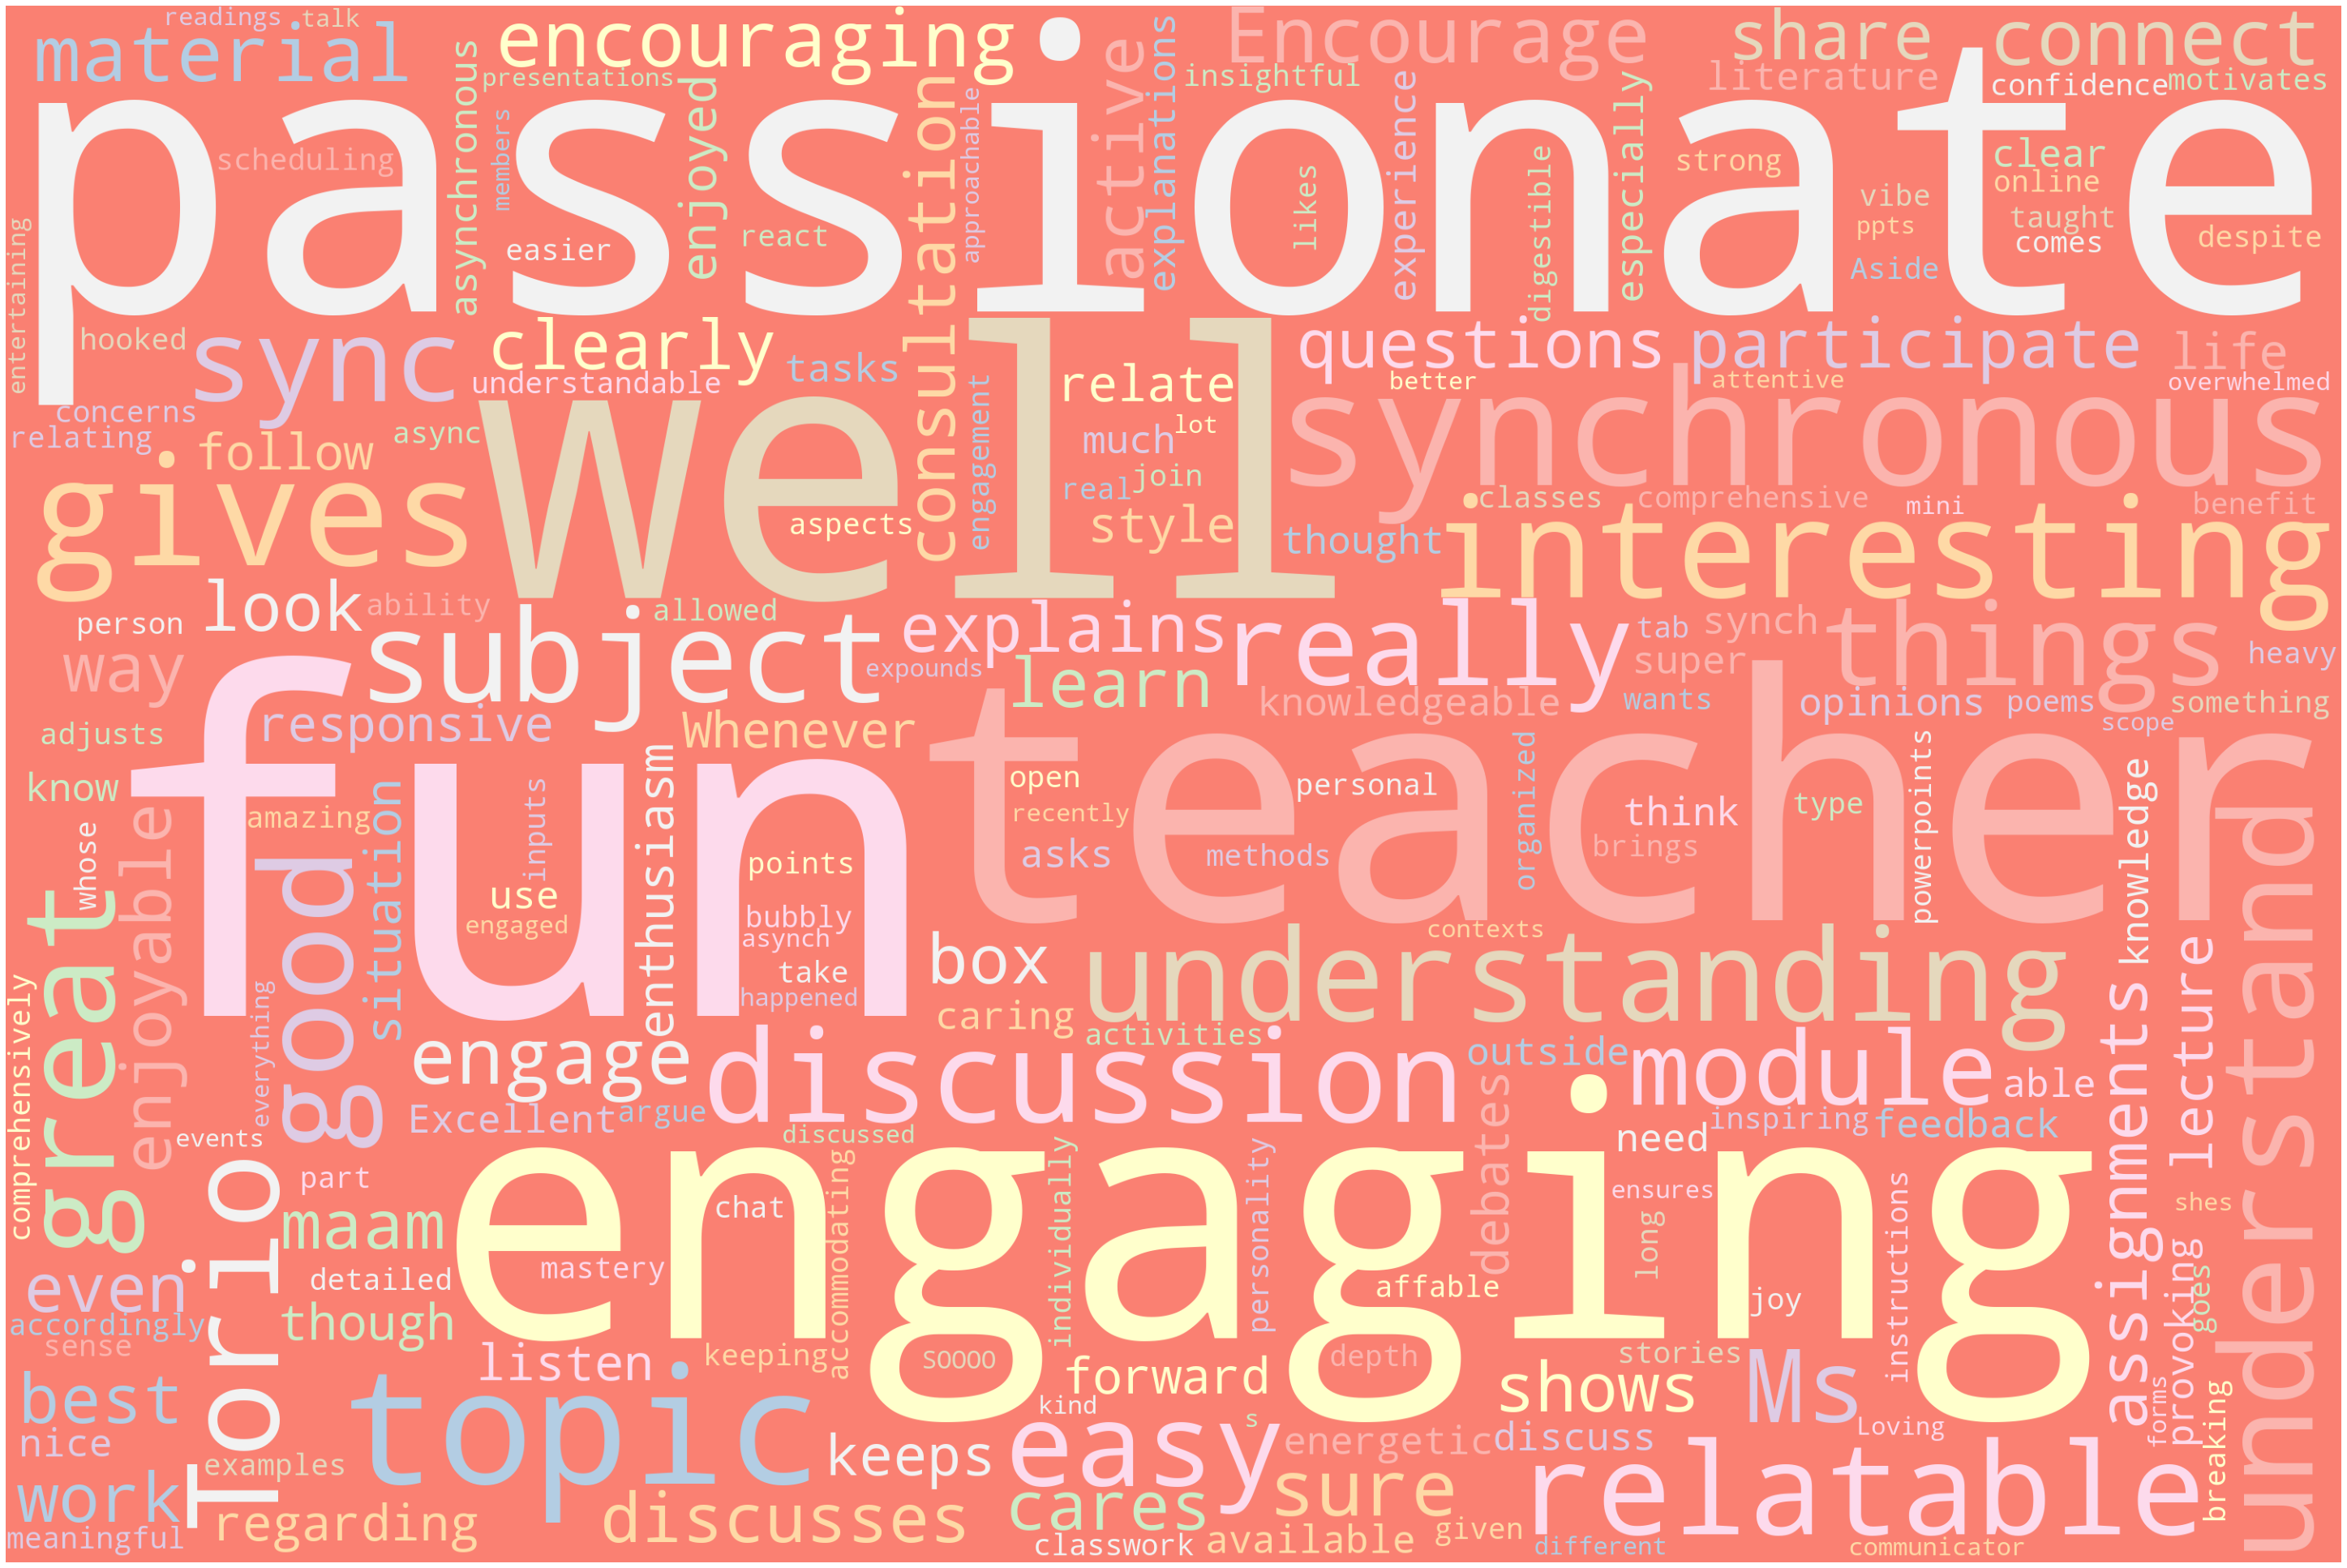

In [12]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Pastel1', 
                      collocations=False, 
                      stopwords = stop_words).generate(good_comments)

plt.figure(figsize = (40, 30), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<div><span style="background-color: blue; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> Points for Improvement </span></div>

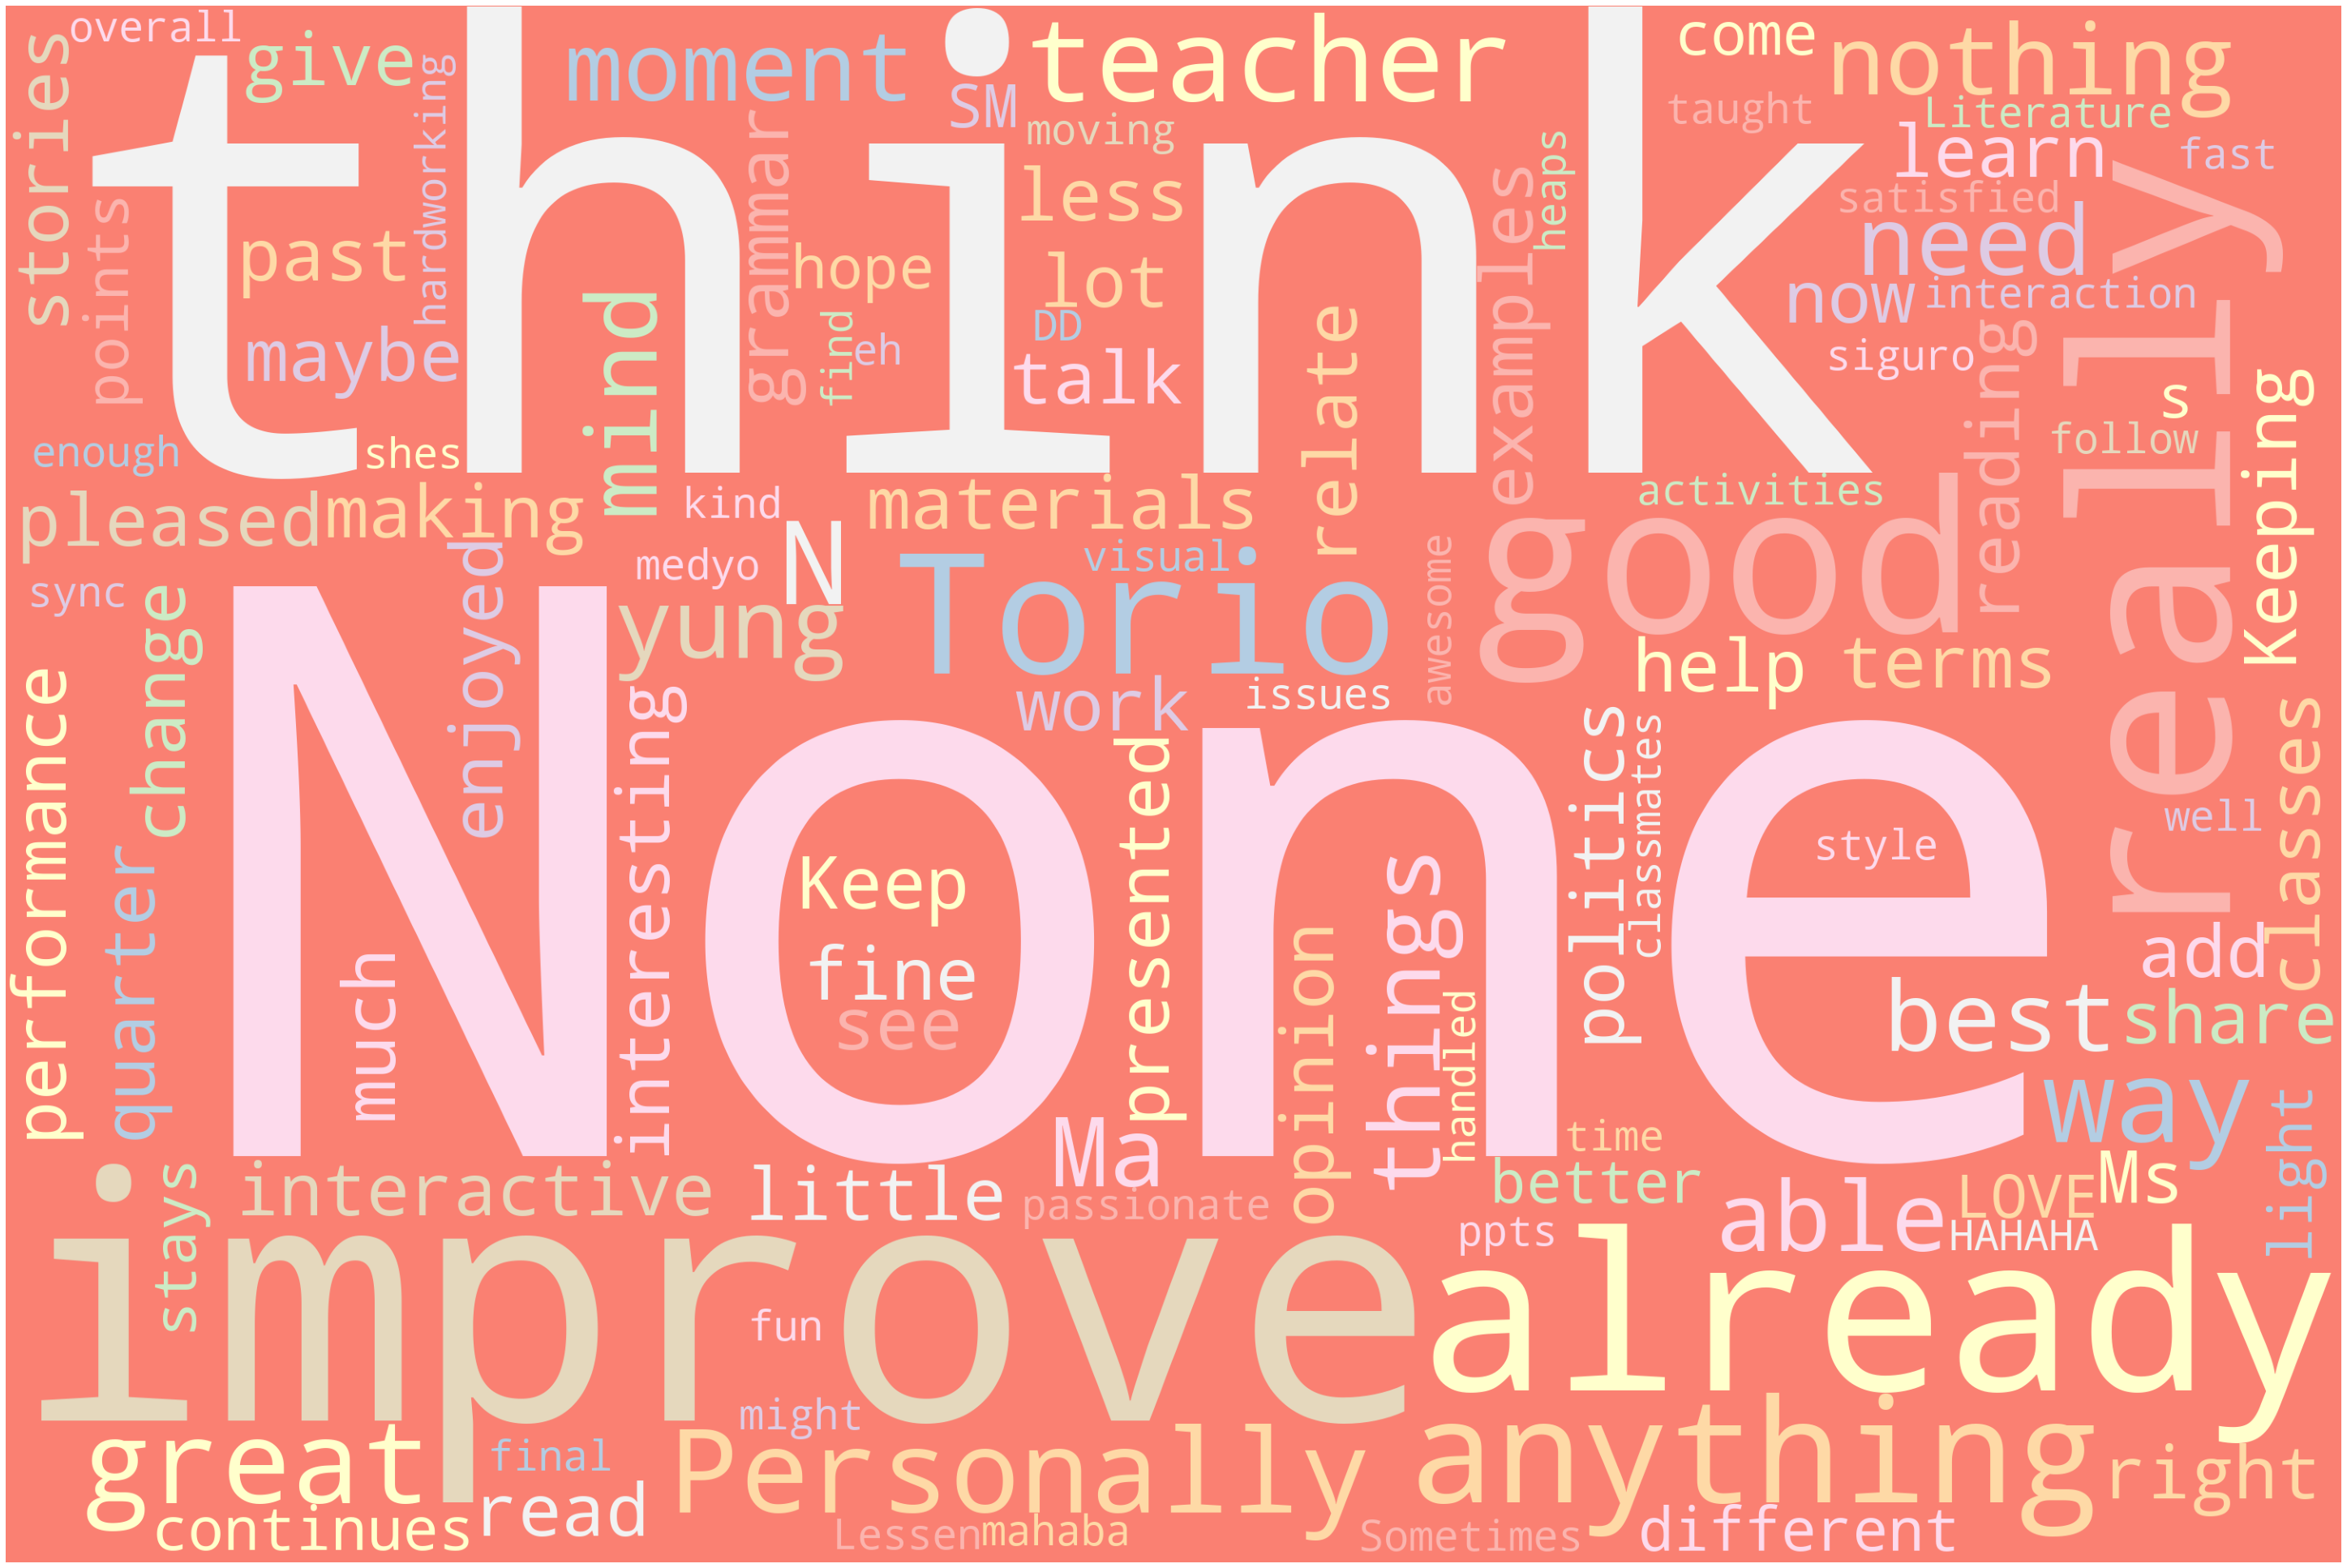

In [13]:
strong_points = df.strong_points.tolist()

improve=[]
for row in df['for_improvement']:
    improve += row.split()
improve = ' '.join(improve)

stop_words_improve = ['think', 'maam', 'torio', 'Torio', 'teacher',
                     'improve'] + list(STOPWORDS)

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Pastel1', 
                      collocations=False, 
                      stopwords = stop_words).generate(improve)

plt.figure(figsize = (40, 30), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<div><span style="background-color: blue; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> Conclusion </span></div>

Based on available data:
- Your passion in teaching can be felt by your students. 
- You are an engaging teacher
- You seem to be fun and understanding.
- Qualitatively and quantatively, there are more good comments than bad comments, suggesting that your students don't have much qualms about you.
- In terms of improvement, check word cloud for possible correlations with how you teach ('mahaba' maybe you go overtime?, 'literature' maybe some students don't understand the material well?, 'materials' maybe add more teaching materials?). But, as data dictates, your students think that there is nothing to improve! :) 
- It maybe miniscule, can be neglected even, but check the following graphs: `guidance`, `feedback`, `encourage`. There are a few students who felt like they weren't given guidance, feedback was given late sometimes, or were not encouraged. Percentage is really small! But good point for reflection.

**General Impression: Based on the analyzed data, you are an amazing teacher. Don't ever think otherwise. Your students love you. Most of all, I love you! Thank you Ms. Torio!**